In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from dotenv import load_dotenv
load_dotenv()  

True

## Components

In [1]:
from haystack.components.embedders import OpenAIDocumentEmbedder
embedder = OpenAIDocumentEmbedder()

In [2]:
embedder

Inputs:
  - documents: List[Document]
Outputs:
  - documents: List[Document]
  - meta: Dict[str, Any]

In [3]:
from haystack.dataclasses import Document

documents = [Document(content="Haystack is an open source AI framework to build full AI applications in Python"),
             Document(content="You can build AI Pipelines by combining Components"),]

embedder.run(documents=documents)

Calculating embeddings: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


{'documents': [Document(id=cca6283a4f41557c49df1c5087a6be0ec172815a8d0c811e435caf6b1a93e0b4, content: 'Haystack is an open source AI framework to build full AI applications in Python', embedding: vector of size 1536),
  Document(id=11ee1490e1dc5cd44361b1541008891b0b40aabd4d5bb2da6a2499f23e6120f7, content: 'You can build AI Pipelines by combining Components', embedding: vector of size 1536)],
 'meta': {'model': 'text-embedding-ada-002',
  'usage': {'prompt_tokens': 24, 'total_tokens': 24}}}

## Pipelines
### Initialize a Document Store
simplest document store - InMemoryDocumentStore

In [4]:
from haystack.document_stores.in_memory import InMemoryDocumentStore
document_store = InMemoryDocumentStore()

### Writing documents with embeddings into a document store


In [6]:
from haystack import Pipeline

from haystack.components.converters.txt import TextFileToDocument
from haystack.components.preprocessors.document_splitter import DocumentSplitter
from haystack.components.embedders import OpenAIDocumentEmbedder
from haystack.components.writers import DocumentWriter

converter = TextFileToDocument()    #converts files to documents
splitter = DocumentSplitter()       #splits documents into chunks
embedder = OpenAIDocumentEmbedder() #creates vector embeddings
writer = DocumentWriter(document_store=document_store)  #writes embeddings into vector data store

#creating Pipeline
indexing_pipeline = Pipeline()

#adding components to the pipeline
indexing_pipeline.add_component("converter", converter)
indexing_pipeline.add_component("splitter", splitter)
indexing_pipeline.add_component("embedder", embedder)
indexing_pipeline.add_component("writer", writer)

#### Connecting Components

In [7]:
indexing_pipeline.connect("converter", "splitter")
indexing_pipeline.connect("splitter", "embedder")
indexing_pipeline.connect("embedder", "writer")

🚅 Components
  - converter: TextFileToDocument
  - splitter: DocumentSplitter
  - embedder: OpenAIDocumentEmbedder
  - writer: DocumentWriter
🛤️ Connections
  - converter.documents -> splitter.documents (List[Document])
  - splitter.documents -> embedder.documents (List[Document])
  - embedder.documents -> writer.documents (List[Document])

##### Visualising the pipeline

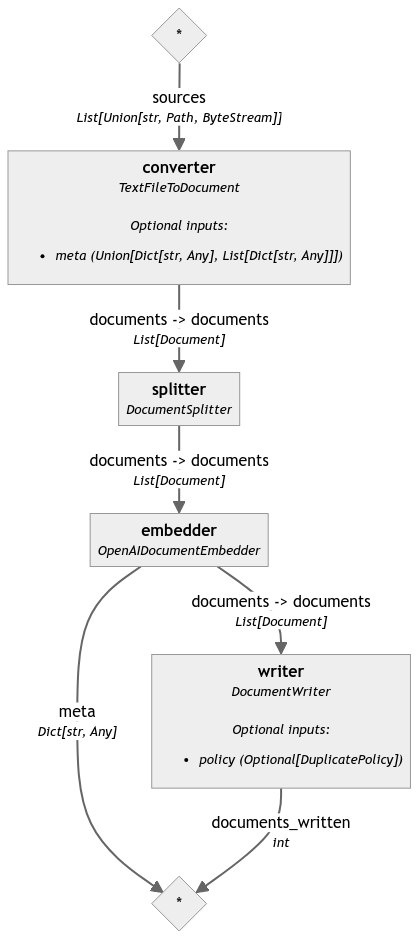

In [8]:
indexing_pipeline.show()

#### Running Pipelines

In [10]:
indexing_pipeline.run({"converter": {"sources": [r'C:\Users\Ivana\Desktop\CODELearning\LLM.HaystackPipeline\bio.txt']}})

Calculating embeddings: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


{'embedder': {'meta': {'model': 'text-embedding-ada-002',
   'usage': {'prompt_tokens': 3255, 'total_tokens': 3255}}},
 'writer': {'documents_written': 11}}

In [11]:
document_store.filter_documents()[5].content

"German Language Professionals, where she organizes conferences and delivers plenary lectures on language education.\r\n\r\nTechnical Skills and some libraries that Ivana works with:\r\nPython, NLTK, SpaCy, Regular Expressions, OCR, Pattern Recognition, Gensim, Pandas, Numpy, Text Preprocessing, Git, Command Line, Prompt Engineering, LangChain, LlamaIndex, Azure, AWS, ChatGPT, HuggingFace, Streamlit, SQL/SQLAlchemy,  Command Line/Gitbash, SPSS\r\n\r\nMy Prompt Engineering skills and techniques:\r\nOne of the most challenging situation in prompt engineering was LLM hallucination. \r\nPreventing hallucinations in AI models like GPT involves careful prompt engineering. There are some techniques that help reduce hallucinations\r\nand i'm the biggest fan of RAG approach aswell as combining RAG with other prompt techniques like Few-Shot-Prompting, Explicit Context Specifications, well managed and designed structure of prompt or steps for LLM to follow. \r\nIn this techniques linguistical but

### Creating a document search pipeline

In [12]:
from haystack.components.embedders import OpenAITextEmbedder
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

query_embedder = OpenAITextEmbedder()
retriever = InMemoryEmbeddingRetriever(document_store=document_store)

document_search = Pipeline()

document_search.add_component("query_embedder", query_embedder)
document_search.add_component("retriever", retriever)

document_search.connect("query_embedder.embedding", "retriever.query_embedding")

🚅 Components
  - query_embedder: OpenAITextEmbedder
  - retriever: InMemoryEmbeddingRetriever
🛤️ Connections
  - query_embedder.embedding -> retriever.query_embedding (List[float])

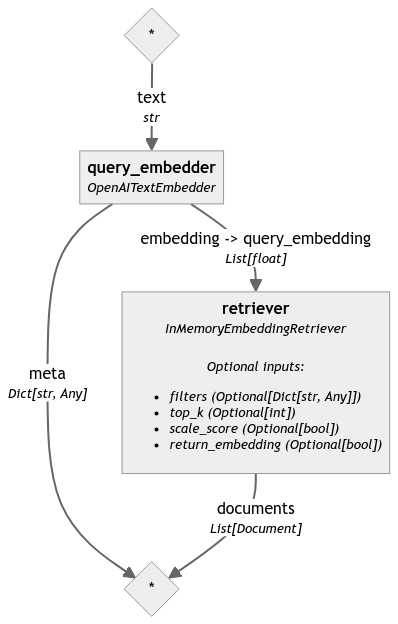

In [13]:
document_search.show()

In [16]:
question = "What are Ivanas Project?"

results = document_search.run({"query_embedder": {"text": question},
                               "retriever": {"top_k": 3}})

for i, document in enumerate(results["retriever"]["documents"]):
    print("\n--------------\n")
    print(f"DOCUMENT {i}")
    print(document.content)


--------------

DOCUMENT 0
portfolio is mainly Github with projects in ML/NLP developlment as well few in applying AI in applications. 
Her scientific portfolio is available on https://www.croris.hr/osobe/profil/41695


Availability:
As Intern Ivana is actively seeking new job opportunities and is possibly ready to start next month.


References and Recommendation letters:
References and recommendation letters are available upon request.


Strengths and Advantages:
Ivana's strengths lie in a profound passion for technology, languages, self-development, innovative problem-solving, and client-centric solutions.


Weaknesses and Disadvantages:
Ivana's unwavering pursuit of excellence may occasionally lead to in-depth analysis, but it ensures the delivery of high-quality services.


Interests and Hobbies:
Ivana's passion for technology extends beyond her professional life, where she continues to explore the cutting-edge world of GenAI, always eager to push the boundaries in various innova